In [1]:
import numpy as np
from pathlib import Path
import sys
from statannot.statannot import add_stat_annotation

import matplotlib.pyplot as plt
import seaborn as sbn

dir_path = '/home/nnieto/Nico/Harmonization/harmonize_project/3_check_results/'
__file__ = dir_path+'plot_NM.py'
to_append = Path(__file__).resolve().parent.parent.as_posix()
sys.path.append(to_append)

from lib.utils import extract_experiment_data # noqa
from lib.utils import table_generation # noqa

# DATASETS: eNKI, 1000brains, CamCAN, AOMIC-ID1000. PRED: RVR, STACK: RF.
# Separed site analysis

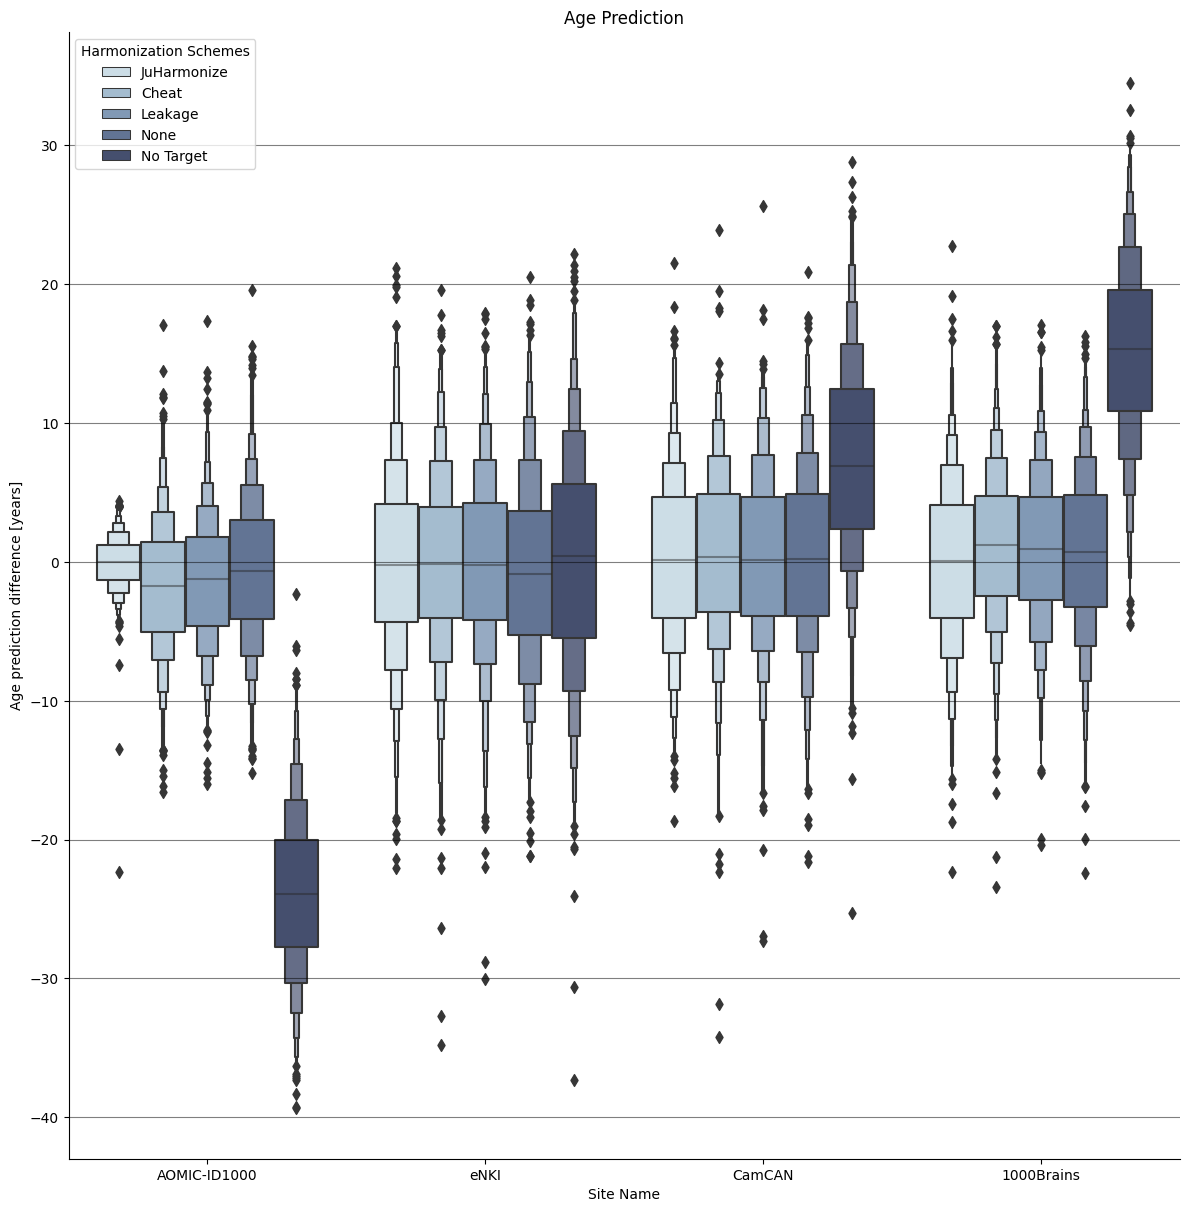

                        Age_bias        R2        MAE
Cheat                  -0.240234  0.915753   4.600000
JuHarmonize            -0.214780  0.926623   4.090806
Leakage                -0.249862  0.916274   4.625743
NeuroHarmony           -0.577847  0.867222   6.020085
No Target              -0.814678  0.331946  14.187270
None                   -0.269594  0.908340   4.892786
predict_pretend        -0.235226  0.919236   4.283451
predict_pretend_nosite -0.293579  0.907692   4.616219
pretend_nosite         -0.304095  0.915869   4.448656


In [7]:
exp_dir = "/home/nnieto/Nico/Harmonization/results_r8"
experiments_to_check = {
    'test_all_regression_r8'
}
data = extract_experiment_data(exp_dir, experiments_to_check)
data["site"].replace({"1000Gehirne": "1000Brains",
                      "ID1000": "AOMIC-ID1000"}, inplace=True)
data["Harmonization Schemes"].replace({"pretend": "JuHarmonize",
                                "target": "Leakage",
                                "none": "None",
                                "cheat": "Cheat",
                                "predict": "NeuroHarmony",
                                "notarget": "No Target"}, inplace=True)

harm_modes = ["JuHarmonize", "Cheat", "Leakage", "None", "No Target"]

data["y_diff"] = (data["y_true"]-data["y_pred"])

pal = sbn.cubehelix_palette(5, rot=-.15, light=0.85, dark=0.3)

sbn.catplot(
    data=data, kind="boxen",
    x="site", y="y_diff", hue="Harmonization Schemes",
    height=12, hue_order=harm_modes, legend_out=False,
    order=["AOMIC-ID1000", "eNKI", "CamCAN", "1000Brains"],
    palette=pal
)
plt.ylabel("Age prediction difference [years]")
plt.xlabel("Site Name")

plt.title("Harmonization Schemes")
# sbn.move_legend(g, "upper right", bbox_to_anchor=(0.90, 0.98), frameon=False)
plt.title("Age Prediction")
plt.grid(alpha=0.5, axis="y", c="black")
plt.show()
table = table_generation(data)
print(table)

# DATASETS: eNKI, 1000brains, CamCAN, AOMIC-ID1000. PRED: RVR, STACK: RF.
# Global comparision With stadistical comparision

             Age_bias        R2        MAE
Cheat       -0.240234  0.915753   4.600000
JuHarmonize -0.214780  0.926623   4.090806
Leakage     -0.249862  0.916274   4.625743
No Target   -0.814678  0.331946  14.187270
None        -0.269594  0.908340   4.892786


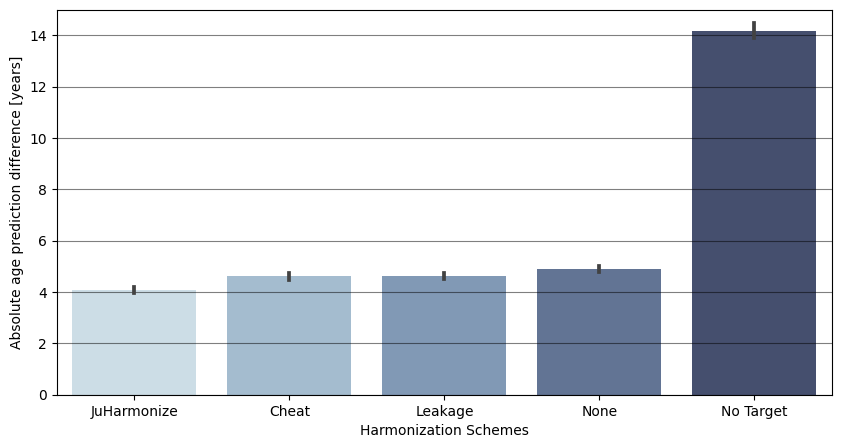

In [13]:
data["y_diff"] = np.abs(data["y_true"]-data["y_pred"])
data = data[data["Harmonization Schemes"].isin(harm_modes)]

fig = plt.figure(figsize=[10, 5])

ax = fig.add_subplot(1, 1, 1)
pal = sbn.cubehelix_palette(5, rot=-.15, light=0.85, dark=0.3)

ax = sbn.barplot(
    data=data,
    x="Harmonization Schemes", y="y_diff",
    order=harm_modes, ax=ax,
    palette=pal, seed=23, n_boot=1000
)
plt.ylabel("Absolute age prediction difference [years]")
plt.xlabel("Harmonization Schemes")
# sbn.move_legend(g, "upper right", bbox_to_anchor=(0.90, 0.98), frameon=False)
table = table_generation(data)
print(table)
plt.grid(alpha=0.5, axis="y", c="black")
plt.ylim([0, 15])

# # Comparisons for statistical test
# box_list = [("JuHarmonize", "Cheat"),
#             ("JuHarmonize", "Leakage"),
#             ("JuHarmonize", "None")]


# add_stat_annotation(ax, data=data, x="Harmonization Schemes", y="y_diff",
#                     box_pairs=box_list, test='Wilcoxon',
#                     text_format='star', loc='outside', order=harm_modes,
#                     verbose=1,
#                     pvalue_thresholds=[[1, "ns"], [0.01, "* p<0.01"]])
plt.show()

# DATASETS: eNKI, 1000brains, CamCAN, AOMIC-ID1000. PRED: RVR, STACK: RF.
# The age have no overlape

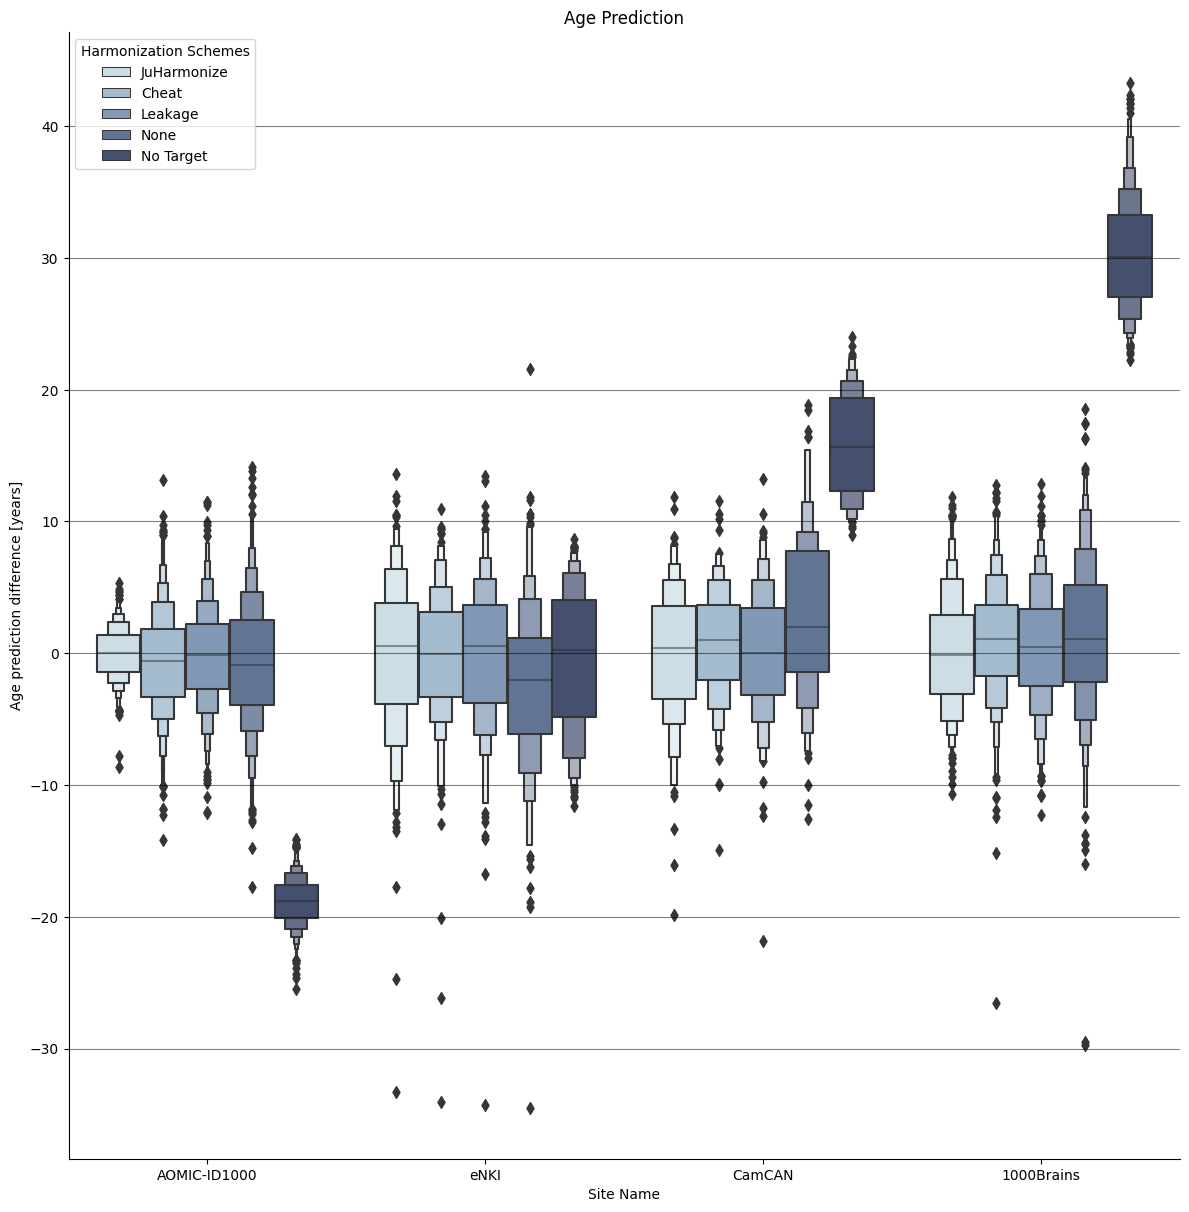

              Age_bias        R2        MAE
Cheat        -0.163459  0.960024   3.358533
JuHarmonize  -0.122256  0.969992   2.702613
Leakage      -0.133907  0.959552   3.424680
NeuroHarmony -0.897801  0.742593   9.539188
No Target    -0.998806  0.003109  20.081712
None         -0.213803  0.933309   4.331851


In [3]:

exp_dir = "/home/nnieto/Nico/Harmonization/results_regression/"
experiments_to_check = {
    'test_regression_separated_ages__rf_stack_rvr_pred'
}
data = extract_experiment_data(exp_dir, experiments_to_check)
data["site"].replace({"1000Gehirne": "1000Brains",
                      "ID1000": "AOMIC-ID1000"}, inplace=True)
data["harmonize_mode"].replace({"pretend": "JuHarmonize",
                                "target": "Leakage",
                                "none": "None",
                                "cheat": "Cheat",
                                "predict": "NeuroHarmony",
                                "notarget": "No Target"}, inplace=True)

harm_modes = ["JuHarmonize", "Cheat", "Leakage", "None", "No Target"]

data["y_diff"] = (data["y_true"]-data["y_pred"])

data.rename(columns={"harmonize_mode": "Harmonization Schemes"},
            inplace=True)

pal = sbn.cubehelix_palette(5, rot=-.15, light=0.85, dark=0.3)

sbn.catplot(
    data=data, kind="boxen",
    x="site", y="y_diff", hue="Harmonization Schemes",
    height=12, hue_order=harm_modes, legend_out=False,
    order=["AOMIC-ID1000", "eNKI",  "CamCAN", "1000Brains"],
    palette=pal
)
plt.ylabel("Age prediction difference [years]")
plt.xlabel("Site Name")

plt.title("Harmonization Schemes")
# sbn.move_legend(g, "upper right", bbox_to_anchor=(0.90, 0.98), frameon=False)
plt.title("Age Prediction")
plt.grid(alpha=0.5, axis="y", c="black")
plt.show()
table = table_generation(data)
print(table)

# BALANCED DATA

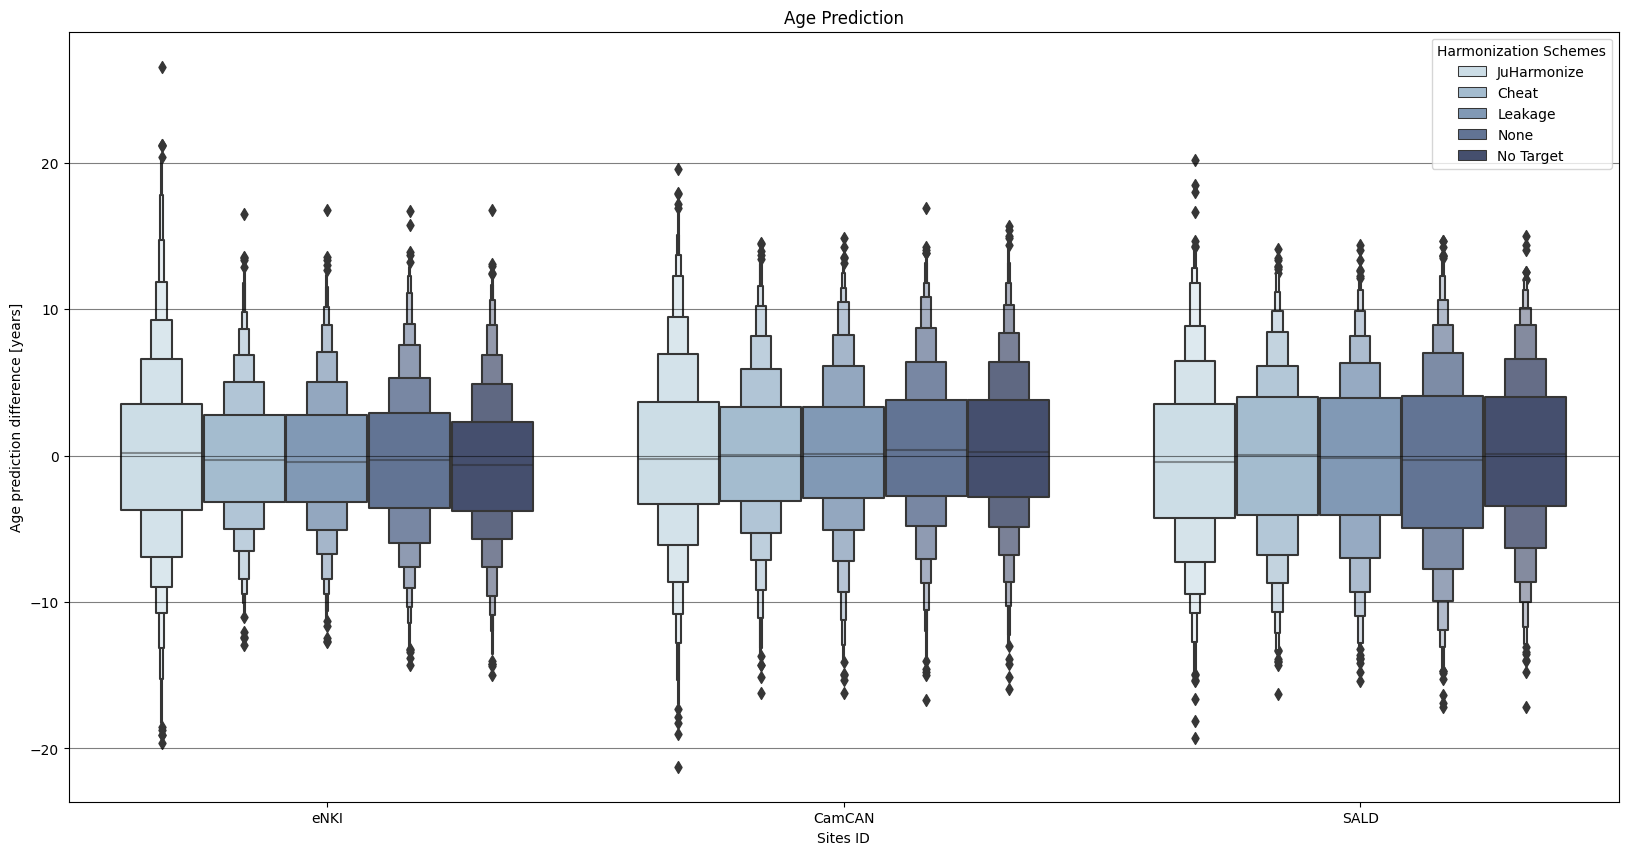

             Age_bias        R2       MAE
Cheat       -0.330115  0.917273  3.914626
JuHarmonize -0.285458  0.878901  4.616624
Leakage     -0.333406  0.915158  3.970039
No Target   -0.334470  0.913585  3.973905
None        -0.353719  0.904034  4.255477


In [6]:
exp_dir = "/home/nnieto/Nico/Harmonization/results_regression/"
experiments_to_check = {'test_regression_balanced_data_rf_stack_rvr_pred'}
data = extract_experiment_data(exp_dir, experiments_to_check, train_acc=True)
data.rename(columns={"harmonize_mode": "Harmonization Schemes"},
            inplace=True)
data["Harmonization Schemes"].replace({"pretend": "JuHarmonize",
                                       "target": "Leakage",
                                       "none": "None",
                                       "cheat": "Cheat",
                                       "notarget": "No Target"}, inplace=True)

harm_modes = ["JuHarmonize", "Cheat", "Leakage", "None", "No Target"]
data = data[data["Harmonization Schemes"].isin(harm_modes)]
absolute = False

if absolute:
    data["y_diff"] = np.abs(data["y_true"]-data["y_pred"])
else:
    data["y_diff"] = data["y_true"]-data["y_pred"]

fig, ax = plt.subplots(1, 1, figsize=[20, 10])
pal = sbn.cubehelix_palette(5, rot=-.15, light=0.85, dark=0.3)

sbn.boxenplot(
    data=data, palette=pal,
    x="site", y="y_diff", hue="Harmonization Schemes",
    hue_order=harm_modes
)
plt.ylabel("Age prediction difference [years]")
plt.title("Age Prediction")
plt.xlabel("Sites ID")
plt.grid(alpha=0.5, axis="y", c="black")
plt.show()

table = table_generation(data)
print(table)

             Age_bias        R2       MAE
Cheat       -0.330115  0.917273  3.914626
JuHarmonize -0.285458  0.878901  4.616624
Leakage     -0.333406  0.915158  3.970039
No Target   -0.334470  0.913585  3.973905
None        -0.353719  0.904034  4.255477


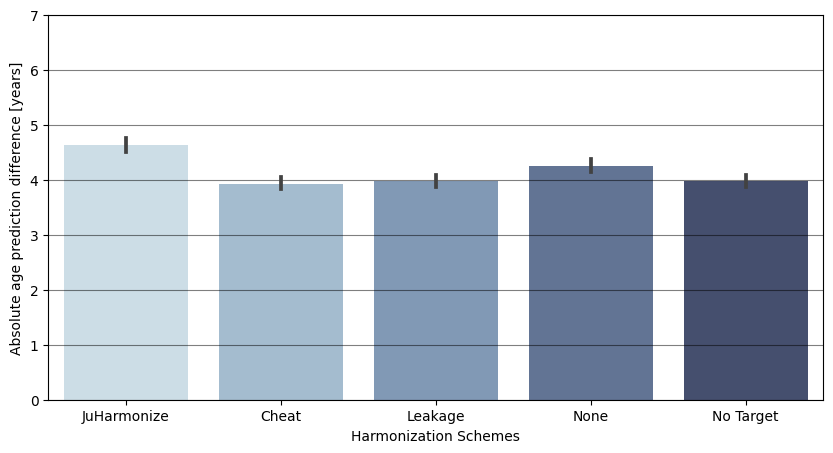

In [7]:
data["y_diff"] = np.abs(data["y_true"]-data["y_pred"])
data = data[data["Harmonization Schemes"].isin(harm_modes)]

fig = plt.figure(figsize=[10, 5])

ax = fig.add_subplot(1, 1, 1)
pal = sbn.cubehelix_palette(5, rot=-.15, light=0.85, dark=0.3)

ax = sbn.barplot(
    data=data,
    x="Harmonization Schemes", y="y_diff",
    order=harm_modes, ax=ax,
    palette=pal, seed=23, n_boot=1000
)
plt.ylabel("Absolute age prediction difference [years]")
plt.xlabel("Harmonization Schemes")
# sbn.move_legend(g, "upper right", bbox_to_anchor=(0.90, 0.98), frameon=False)
table = table_generation(data)
print(table)
plt.grid(alpha=0.5, axis="y", c="black")
plt.ylim([0, 7])

# # Comparisons for statistical test
# box_list = [("JuHarmonize", "Cheat"),
#             ("JuHarmonize", "Leakage"),
#             ("JuHarmonize", "None")]


# add_stat_annotation(ax, data=data, x="Harmonization Schemes", y="y_diff",
#                     box_pairs=box_list, test='Wilcoxon',
#                     text_format='star', loc='outside', order=harm_modes,
#                     verbose=1,
#                     pvalue_thresholds=[[1, "ns"], [0.01, "* p<0.01"]])
plt.show()

# Multiples pipelines

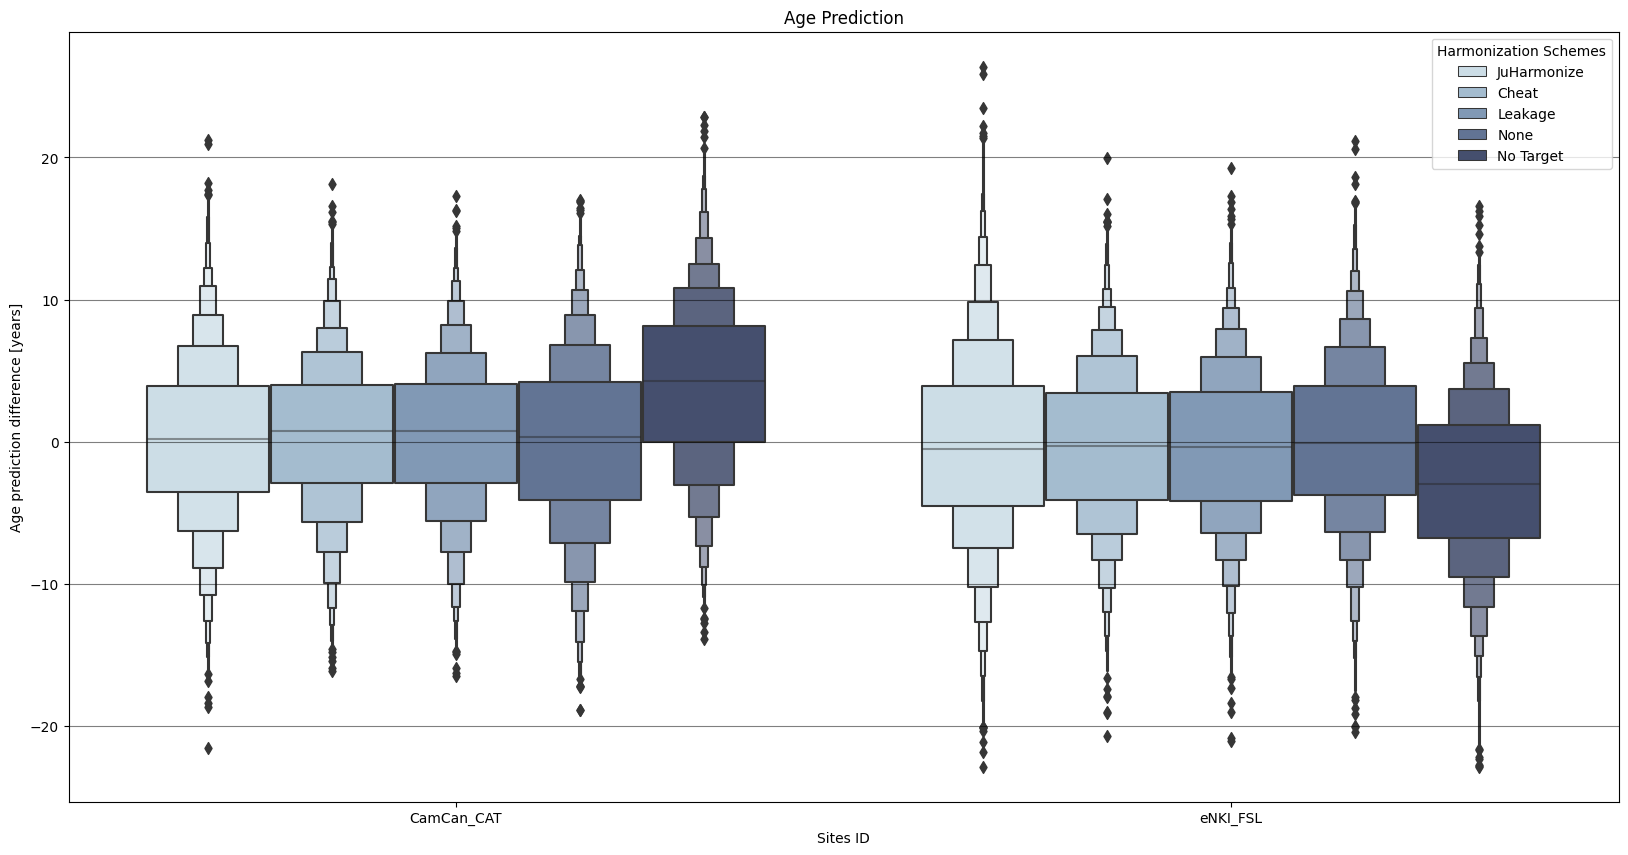

             Age_bias        R2       MAE
Cheat       -0.328370  0.913924  4.265881
JuHarmonize -0.304208  0.881896  4.904715
Leakage     -0.328531  0.913848  4.281762
No Target   -0.403041  0.862038  5.470694
None        -0.354973  0.896560  4.676817


In [2]:
exp_dir = "/home/nnieto/Nico/Harmonization/results_regression/"
experiments_to_check = {'test_regression_multiples_pipelines_rf_stack_rvr_pred_CamCAN_CAT_eNKI_FSL'}
data = extract_experiment_data(exp_dir, experiments_to_check, train_acc=True)
data.rename(columns={"harmonize_mode": "Harmonization Schemes"},
            inplace=True)
data["Harmonization Schemes"].replace({"pretend": "JuHarmonize",
                                       "target": "Leakage",
                                       "none": "None",
                                       "cheat": "Cheat",
                                       "notarget": "No Target"}, inplace=True)

harm_modes = ["JuHarmonize", "Cheat", "Leakage", "None", "No Target"]
data = data[data["Harmonization Schemes"].isin(harm_modes)]
absolute = False

if absolute:
    data["y_diff"] = np.abs(data["y_true"]-data["y_pred"])
else:
    data["y_diff"] = data["y_true"]-data["y_pred"]

fig, ax = plt.subplots(1, 1, figsize=[20, 10])
pal = sbn.cubehelix_palette(5, rot=-.15, light=0.85, dark=0.3)

sbn.boxenplot(
    data=data, palette=pal,
    x="site", y="y_diff", hue="Harmonization Schemes",
    hue_order=harm_modes
)
plt.ylabel("Age prediction difference [years]")
plt.title("Age Prediction")
plt.xlabel("Sites ID")
plt.grid(alpha=0.5, axis="y", c="black")
plt.show()

table = table_generation(data)
print(table)

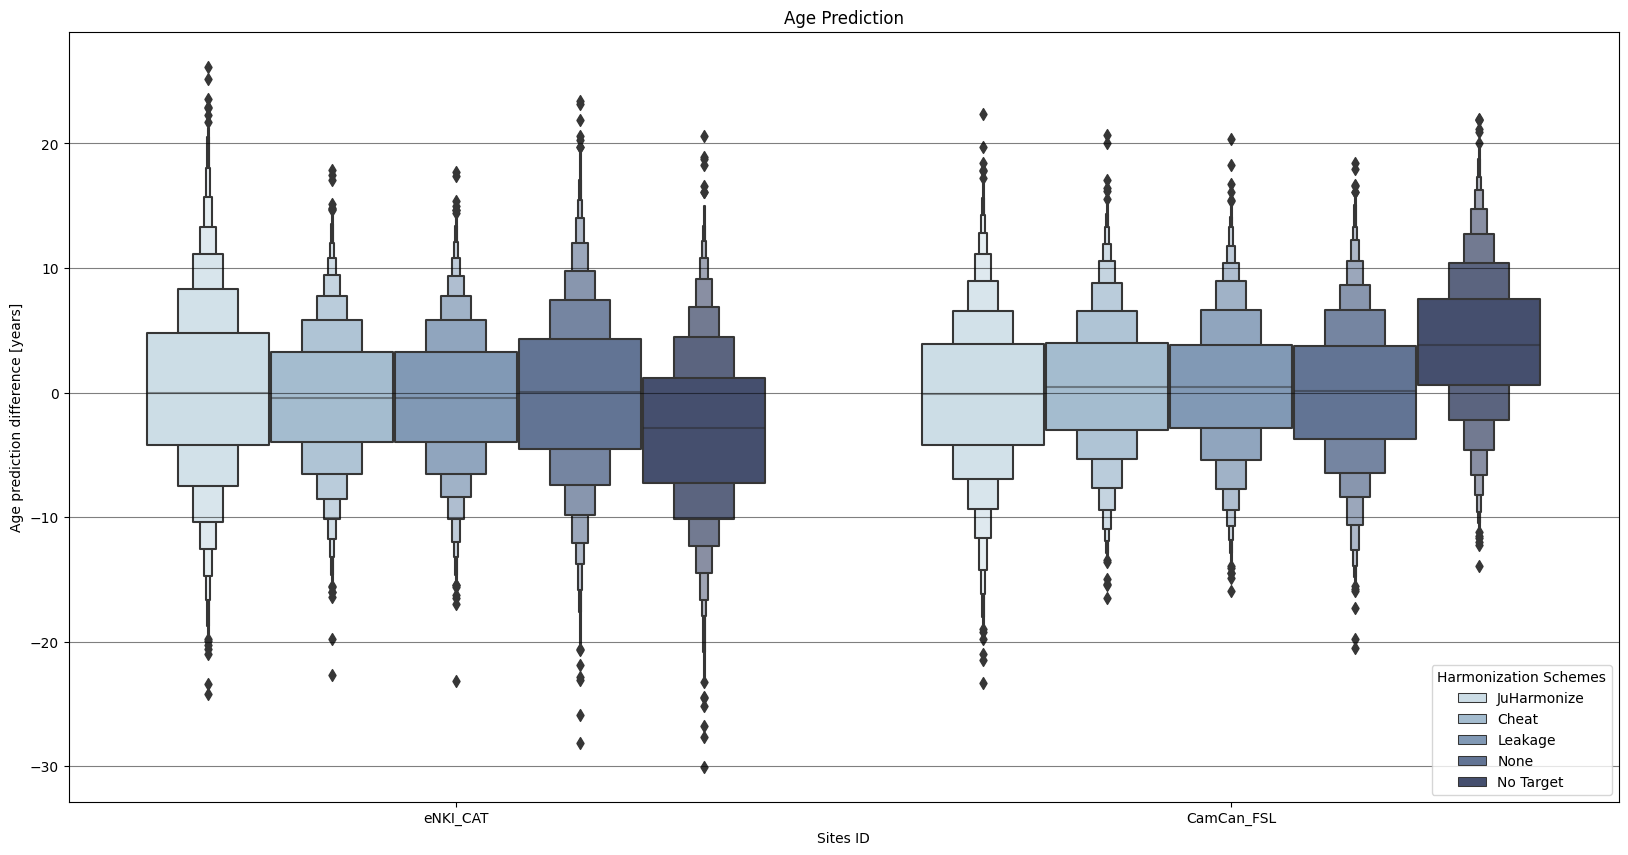

             Age_bias        R2       MAE
Cheat       -0.327047  0.914613  4.208306
JuHarmonize -0.317348  0.868596  5.173316
Leakage     -0.327304  0.915025  4.213048
No Target   -0.411813  0.854869  5.537770
None        -0.371929  0.885749  4.866089


In [3]:
exp_dir = "/home/nnieto/Nico/Harmonization/results_regression/"
experiments_to_check = {'test_regression_multiples_pipelines_rf_stack_rvr_pred_eNKI_CAT_CamCAN_FSL'}
data = extract_experiment_data(exp_dir, experiments_to_check, train_acc=True)
data.rename(columns={"harmonize_mode": "Harmonization Schemes"},
            inplace=True)
data["Harmonization Schemes"].replace({"pretend": "JuHarmonize",
                                       "target": "Leakage",
                                       "none": "None",
                                       "cheat": "Cheat",
                                       "notarget": "No Target"}, inplace=True)

harm_modes = ["JuHarmonize", "Cheat", "Leakage", "None", "No Target"]
data = data[data["Harmonization Schemes"].isin(harm_modes)]
absolute = False

if absolute:
    data["y_diff"] = np.abs(data["y_true"]-data["y_pred"])
else:
    data["y_diff"] = data["y_true"]-data["y_pred"]

fig, ax = plt.subplots(1, 1, figsize=[20, 10])
pal = sbn.cubehelix_palette(5, rot=-.15, light=0.85, dark=0.3)

sbn.boxenplot(
    data=data, palette=pal,
    x="site", y="y_diff", hue="Harmonization Schemes",
    hue_order=harm_modes
)
plt.ylabel("Age prediction difference [years]")
plt.title("Age Prediction")
plt.xlabel("Sites ID")
plt.grid(alpha=0.5, axis="y", c="black")
plt.show()

table = table_generation(data)
print(table)

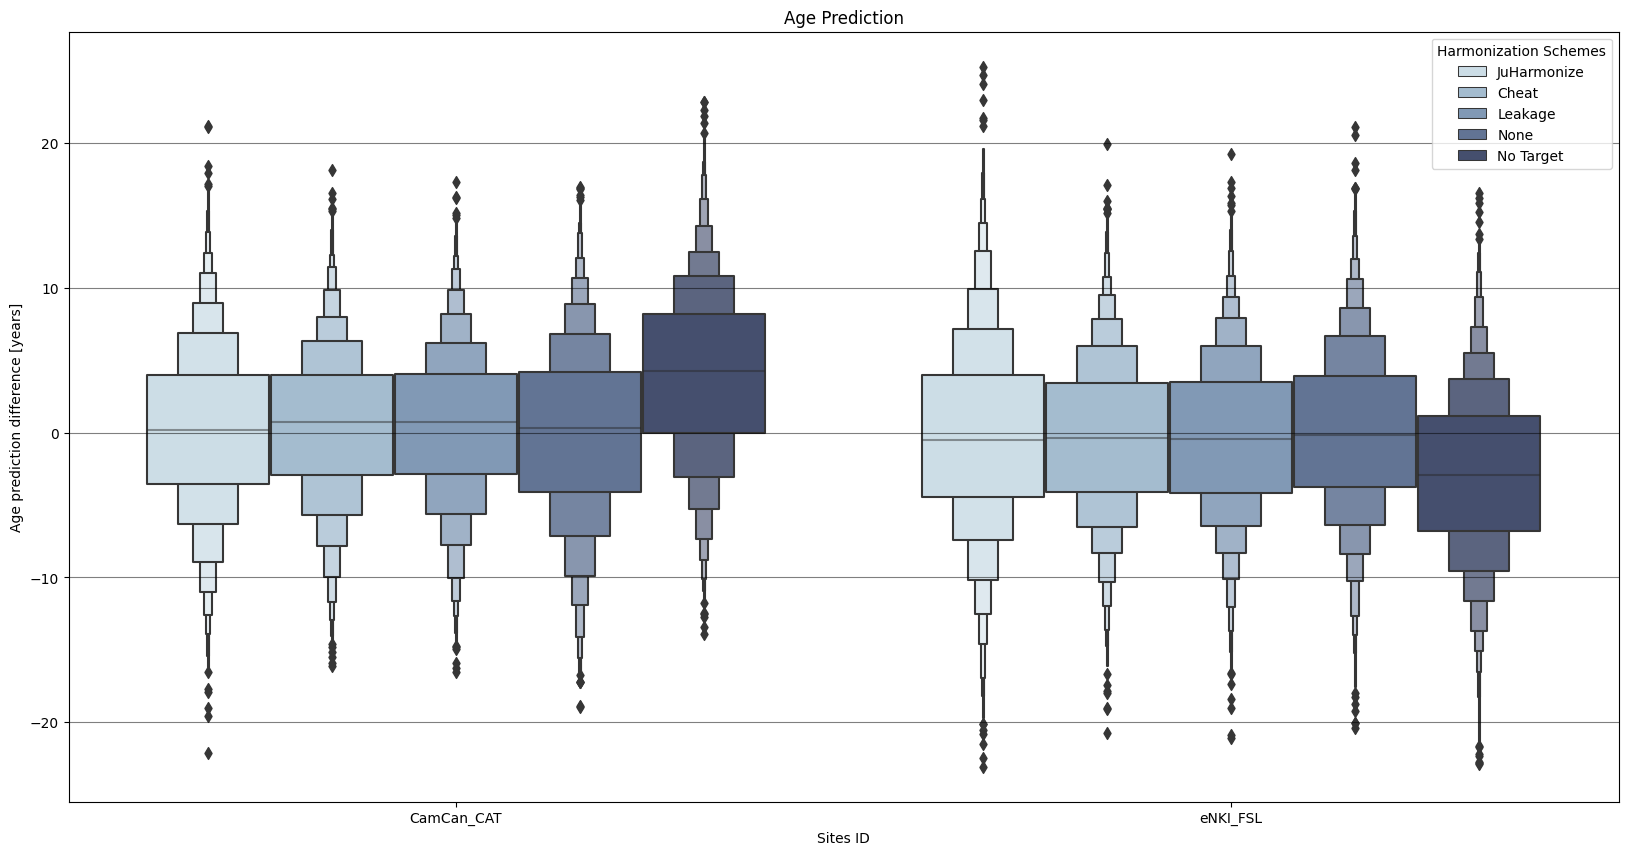

             Age_bias        R2       MAE
Cheat       -0.328370  0.913924  4.265881
JuHarmonize -0.304651  0.882024  4.904388
Leakage     -0.328531  0.913848  4.281762
No Target   -0.403041  0.862038  5.470694
None        -0.354973  0.896560  4.676817


In [4]:
exp_dir = "/home/nnieto/Nico/Harmonization/results_regression/"
experiments_to_check = {'test_regression_multiples_pipelines_rf_stack_rvr_pred_CamCAN_CAT_eNKI_FSL_20points'}
data = extract_experiment_data(exp_dir, experiments_to_check, train_acc=True)
data.rename(columns={"harmonize_mode": "Harmonization Schemes"},
            inplace=True)
data["Harmonization Schemes"].replace({"pretend": "JuHarmonize",
                                       "target": "Leakage",
                                       "none": "None",
                                       "cheat": "Cheat",
                                       "notarget": "No Target"}, inplace=True)

harm_modes = ["JuHarmonize", "Cheat", "Leakage", "None", "No Target"]
data = data[data["Harmonization Schemes"].isin(harm_modes)]
absolute = False

if absolute:
    data["y_diff"] = np.abs(data["y_true"]-data["y_pred"])
else:
    data["y_diff"] = data["y_true"]-data["y_pred"]

fig, ax = plt.subplots(1, 1, figsize=[20, 10])
pal = sbn.cubehelix_palette(5, rot=-.15, light=0.85, dark=0.3)

sbn.boxenplot(
    data=data, palette=pal,
    x="site", y="y_diff", hue="Harmonization Schemes",
    hue_order=harm_modes
)
plt.ylabel("Age prediction difference [years]")
plt.title("Age Prediction")
plt.xlabel("Sites ID")
plt.grid(alpha=0.5, axis="y", c="black")
plt.show()

table = table_generation(data)
print(table)

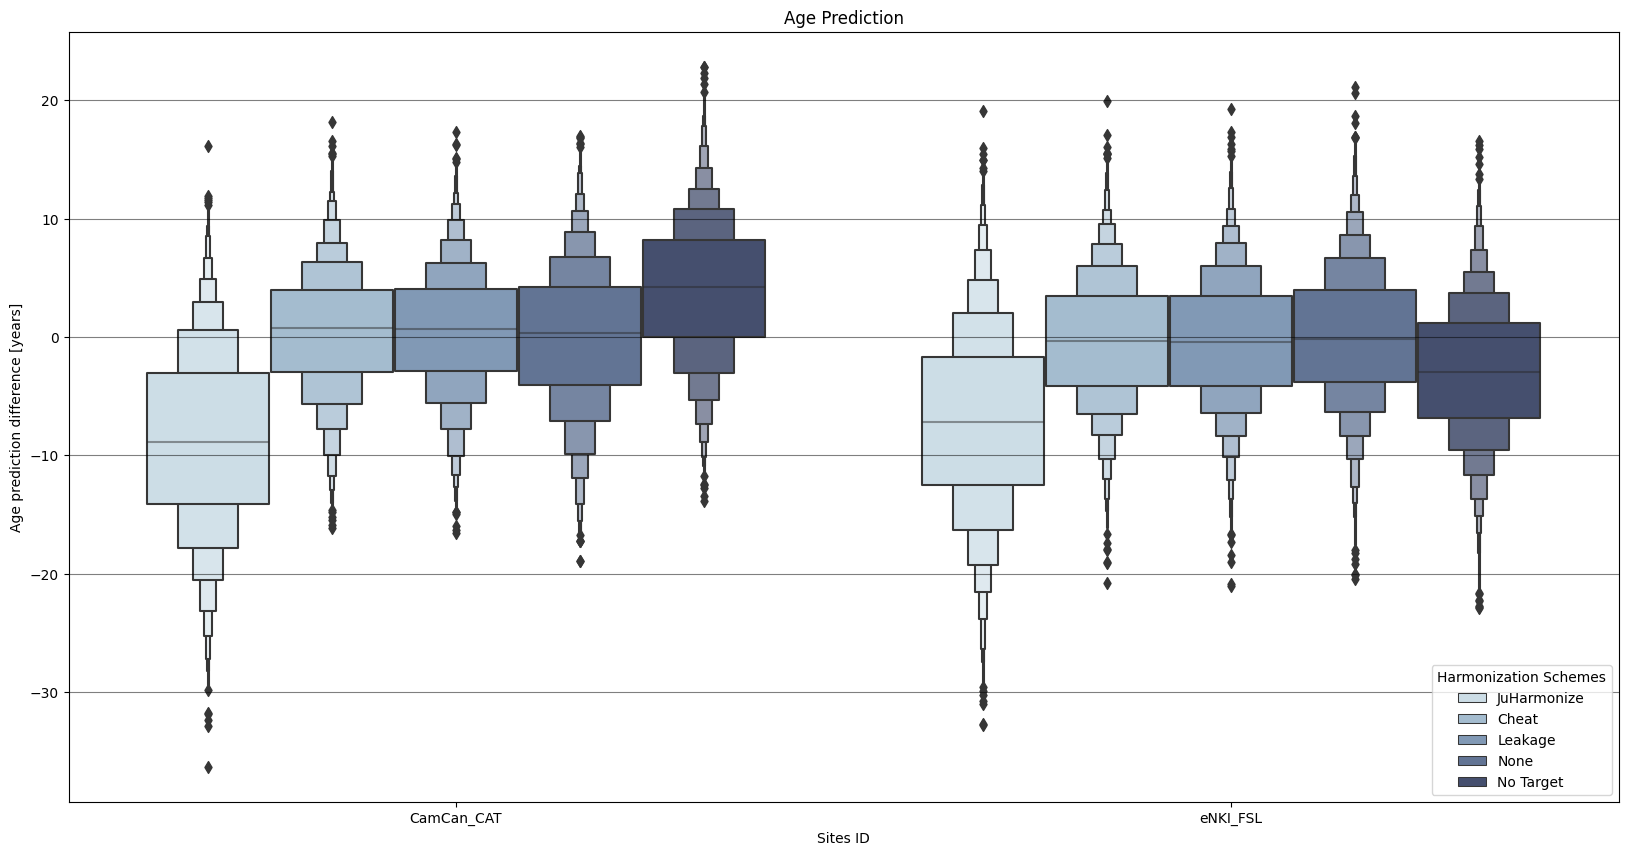

             Age_bias        R2       MAE
Cheat       -0.328370  0.913924  4.265881
JuHarmonize -0.157768  0.627919  9.108382
Leakage     -0.328531  0.913848  4.281762
No Target   -0.403041  0.862038  5.470694
None        -0.354973  0.896560  4.676817


In [5]:
exp_dir = "/home/nnieto/Nico/Harmonization/results_regression/"
experiments_to_check = {'test_regression_multiples_pipelines_LinearSVR_stack_rvr_pred_CamCAN_CAT_eNKI_FSL_20points'}
data = extract_experiment_data(exp_dir, experiments_to_check, train_acc=True)
data.rename(columns={"harmonize_mode": "Harmonization Schemes"},
            inplace=True)
data["Harmonization Schemes"].replace({"pretend": "JuHarmonize",
                                       "target": "Leakage",
                                       "none": "None",
                                       "cheat": "Cheat",
                                       "notarget": "No Target"}, inplace=True)

harm_modes = ["JuHarmonize", "Cheat", "Leakage", "None", "No Target"]
data = data[data["Harmonization Schemes"].isin(harm_modes)]
absolute = False

if absolute:
    data["y_diff"] = np.abs(data["y_true"]-data["y_pred"])
else:
    data["y_diff"] = data["y_true"]-data["y_pred"]

fig, ax = plt.subplots(1, 1, figsize=[20, 10])
pal = sbn.cubehelix_palette(5, rot=-.15, light=0.85, dark=0.3)

sbn.boxenplot(
    data=data, palette=pal,
    x="site", y="y_diff", hue="Harmonization Schemes",
    hue_order=harm_modes
)
plt.ylabel("Age prediction difference [years]")
plt.title("Age Prediction")
plt.xlabel("Sites ID")
plt.grid(alpha=0.5, axis="y", c="black")
plt.show()

table = table_generation(data)
print(table)

<AxesSubplot: xlabel='y_true', ylabel='y_pred'>

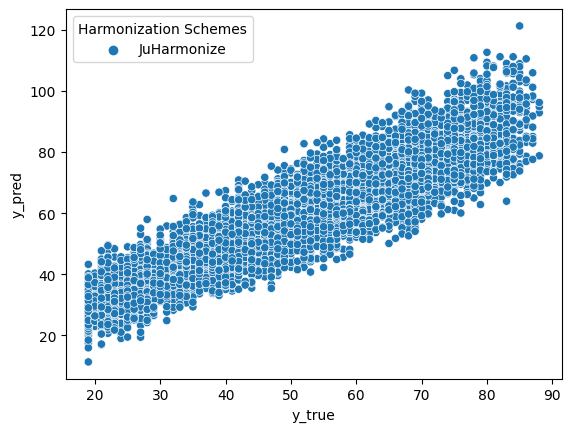

In [10]:
harm_modes = 'JuHarmonize'

data_to_plot = data[data["Harmonization Schemes"] == harm_modes]

sbn.scatterplot(
    data=data_to_plot,
    x="y_true", y="y_pred", hue="Harmonization Schemes",
)

# Noisy data

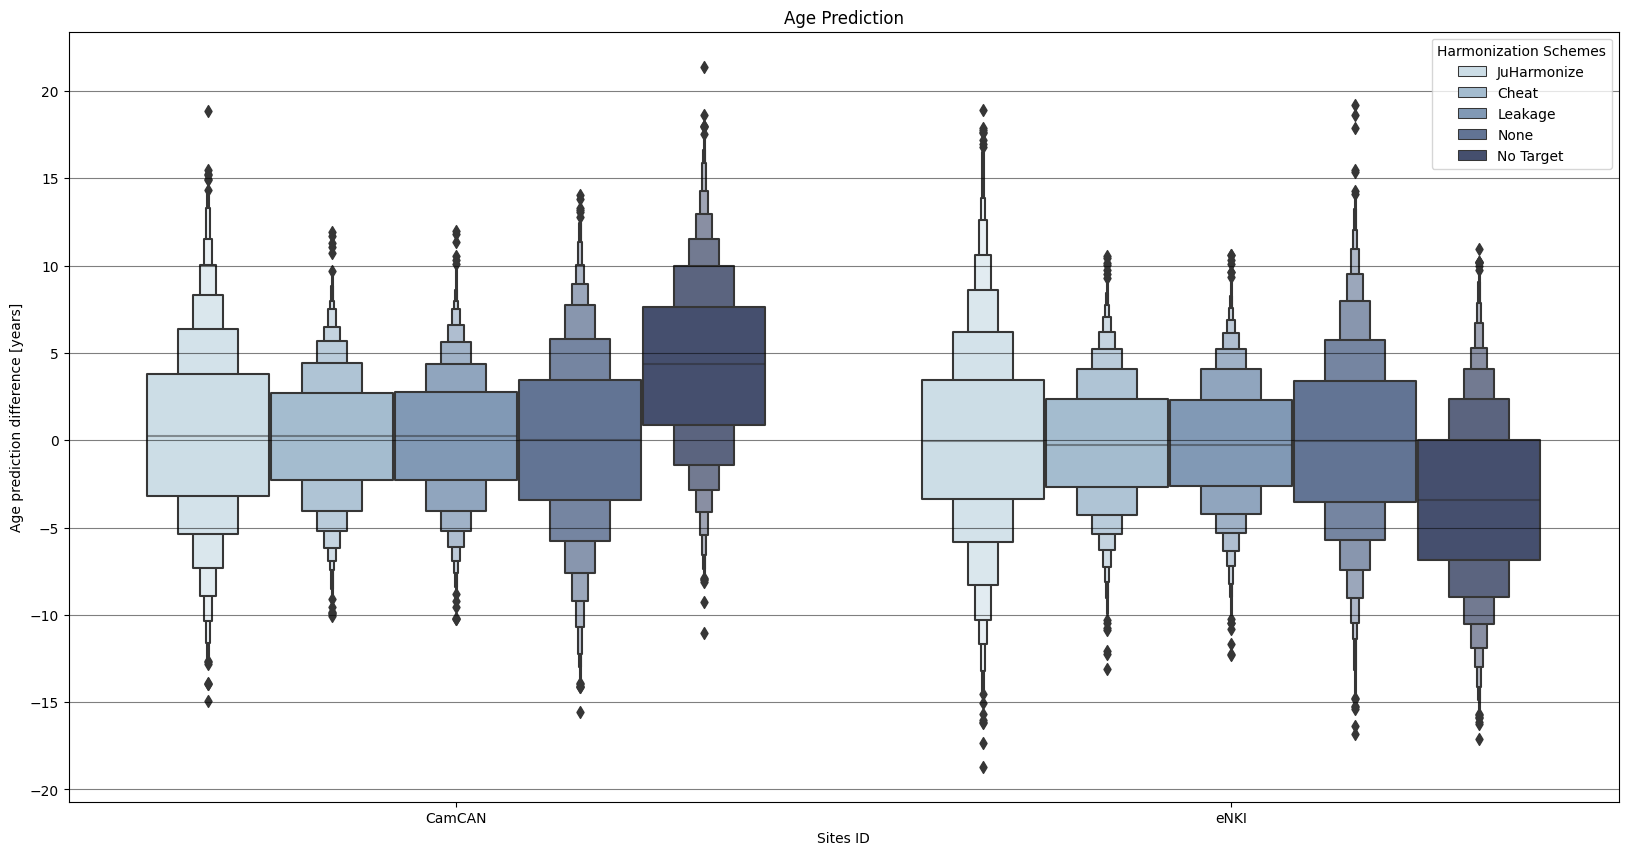

             Age_bias        R2       MAE
Cheat       -0.263356  0.963578  2.855092
JuHarmonize -0.116571  0.917400  4.142410
Leakage     -0.263083  0.963700  2.848770
No Target   -0.390319  0.889657  4.983254
None        -0.323368  0.926129  4.013841


In [12]:
exp_dir = "/home/nnieto/Nico/Harmonization/results_regression/"
experiments_to_check = {'test_regression_noisy_data_rf_stack_rvr_pred_CamCAN_eNKI'}
data = extract_experiment_data(exp_dir, experiments_to_check, train_acc=True)
data.rename(columns={"harmonize_mode": "Harmonization Schemes"},
            inplace=True)
data["Harmonization Schemes"].replace({"pretend": "JuHarmonize",
                                       "target": "Leakage",
                                       "none": "None",
                                       "cheat": "Cheat",
                                       "notarget": "No Target"}, inplace=True)

harm_modes = ["JuHarmonize", "Cheat", "Leakage", "None", "No Target"]
data = data[data["Harmonization Schemes"].isin(harm_modes)]
absolute = False

if absolute:
    data["y_diff"] = np.abs(data["y_true"]-data["y_pred"])
else:
    data["y_diff"] = data["y_true"]-data["y_pred"]

fig, ax = plt.subplots(1, 1, figsize=[20, 10])
pal = sbn.cubehelix_palette(5, rot=-.15, light=0.85, dark=0.3)

sbn.boxenplot(
    data=data, palette=pal,
    x="site", y="y_diff", hue="Harmonization Schemes",
    hue_order=harm_modes
)
plt.ylabel("Age prediction difference [years]")
plt.title("Age Prediction")
plt.xlabel("Sites ID")
plt.grid(alpha=0.5, axis="y", c="black")
plt.show()

table = table_generation(data)
print(table)

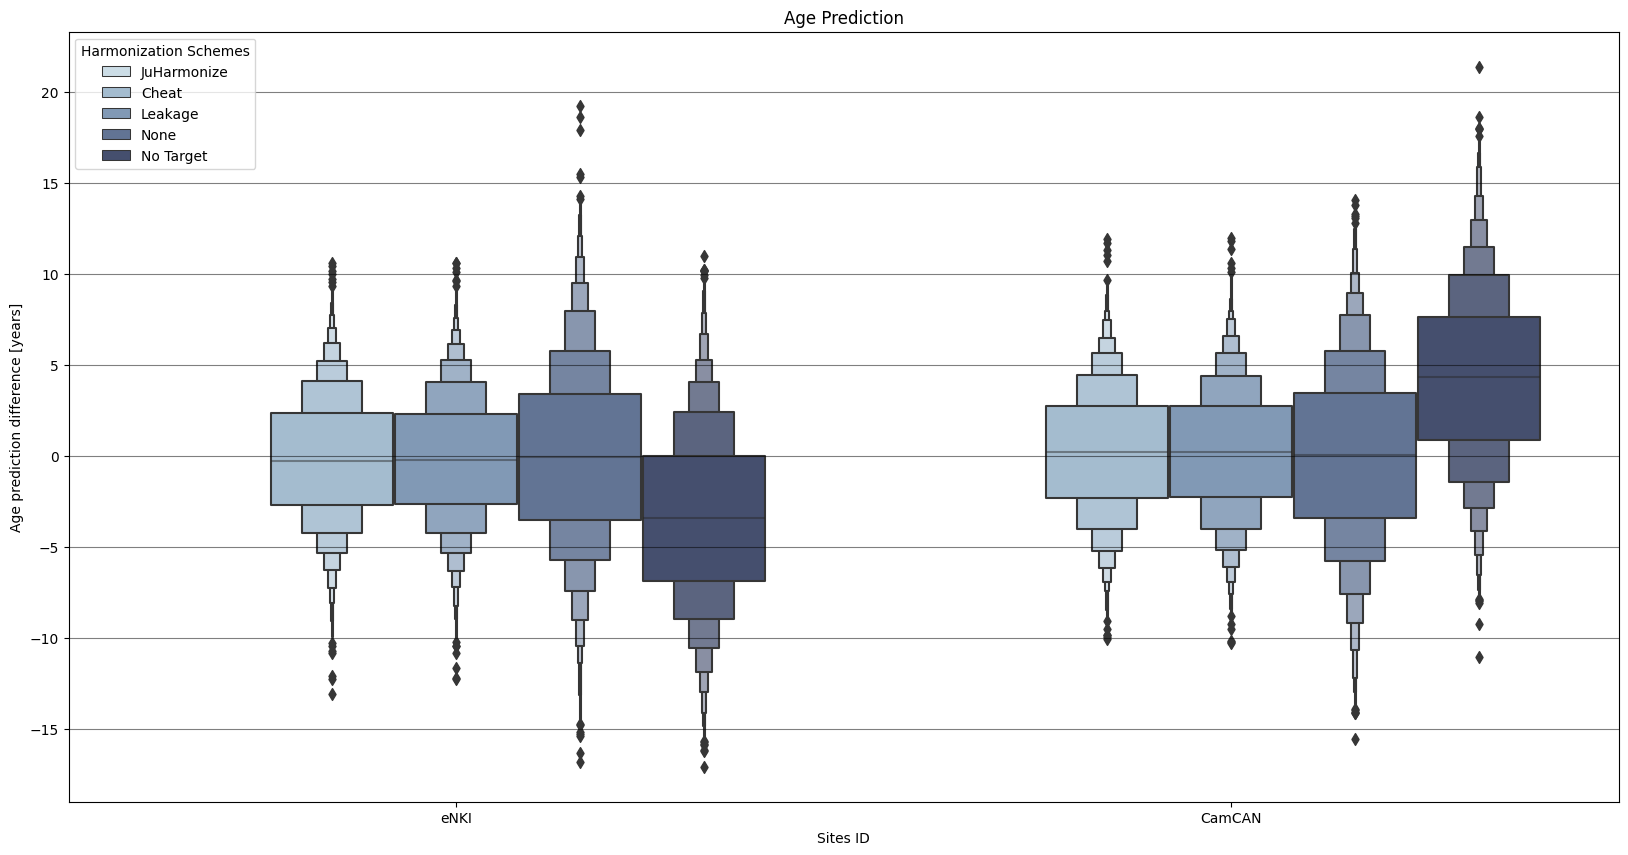

           Age_bias        R2       MAE
Cheat     -0.263356  0.963578  2.855092
Leakage   -0.263083  0.963700  2.848770
No Target -0.390319  0.889657  4.983254
None      -0.323368  0.926129  4.013841


In [13]:
exp_dir = "/home/nnieto/Nico/Harmonization/results_regression/"
experiments_to_check = {'test_regression_noisy_data_rf_stack_rvr_pred_CamCAN_eNKI_100images'}
data = extract_experiment_data(exp_dir, experiments_to_check, train_acc=True)
data.rename(columns={"harmonize_mode": "Harmonization Schemes"},
            inplace=True)
data["Harmonization Schemes"].replace({"pretend": "JuHarmonize",
                                       "target": "Leakage",
                                       "none": "None",
                                       "cheat": "Cheat",
                                       "notarget": "No Target"}, inplace=True)

harm_modes = ["JuHarmonize", "Cheat", "Leakage", "None", "No Target"]
data = data[data["Harmonization Schemes"].isin(harm_modes)]
absolute = False

if absolute:
    data["y_diff"] = np.abs(data["y_true"]-data["y_pred"])
else:
    data["y_diff"] = data["y_true"]-data["y_pred"]

fig, ax = plt.subplots(1, 1, figsize=[20, 10])
pal = sbn.cubehelix_palette(5, rot=-.15, light=0.85, dark=0.3)

sbn.boxenplot(
    data=data, palette=pal,
    x="site", y="y_diff", hue="Harmonization Schemes",
    hue_order=harm_modes
)
plt.ylabel("Age prediction difference [years]")
plt.title("Age Prediction")
plt.xlabel("Sites ID")
plt.grid(alpha=0.5, axis="y", c="black")
plt.show()

table = table_generation(data)
print(table)

In [ ]:
             Age_bias        R2       MAE
Cheat       -0.263356  0.963578  2.855092
Leakage     -0.263083  0.963700  2.848770
No Target   -0.390319  0.889657  4.983254
None        -0.323368  0.926129  4.013841